<h1>Understanding the Importance of First Serve in Tennis with Data Science</h1>

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)

In [2]:
# Importing the file
data = pd.read_csv('./Desktop/tennis_atp-master/atp_matches_2019.csv')
data.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,2019-M020,Brisbane,Hard,32,A,20181231,300,105453,2,NaN,Kei Nishikori,R,178.0,JPN,29.004791,106421,4,NaN,Daniil Medvedev,R,NaN,RUS,22.885695,6-4 3-6 6-2,3,F,124.0,3.0,3.0,77.0,44.0,31.0,17.0,13.0,3.0,6.0,8.0,6.0,100.0,54.0,34.0,20.0,14.0,10.0,15.0,9.0,3590.0,16.0,1977.0
1,2019-M020,Brisbane,Hard,32,A,20181231,299,106421,4,NaN,Daniil Medvedev,R,NaN,RUS,22.885695,104542,NaN,PR,Jo-Wilfried Tsonga,R,188.0,FRA,33.705681,7-6(6) 6-2,3,SF,82.0,10.0,1.0,52.0,33.0,28.0,14.0,10.0,0.0,1.0,17.0,2.0,77.0,52.0,36.0,7.0,10.0,10.0,13.0,16.0,1977.0,239.0,200.0
2,2019-M020,Brisbane,Hard,32,A,20181231,298,105453,2,NaN,Kei Nishikori,R,178.0,JPN,29.004791,104871,NaN,NaN,Jeremy Chardy,R,188.0,FRA,31.882272,6-2 6-2,3,SF,66.0,2.0,2.0,47.0,33.0,26.0,9.0,8.0,2.0,2.0,10.0,3.0,46.0,27.0,15.0,6.0,8.0,1.0,5.0,9.0,3590.0,40.0,1050.0
3,2019-M020,Brisbane,Hard,32,A,20181231,297,104542,NaN,PR,Jo-Wilfried Tsonga,R,188.0,FRA,33.705681,200282,7,NaN,Alex De Minaur,R,NaN,AUS,19.868583,6-4 7-6(2),3,QF,106.0,12.0,2.0,68.0,43.0,34.0,15.0,11.0,4.0,5.0,1.0,2.0,81.0,60.0,38.0,9.0,11.0,4.0,6.0,239.0,200.0,31.0,1298.0
4,2019-M020,Brisbane,Hard,32,A,20181231,296,106421,4,NaN,Daniil Medvedev,R,NaN,RUS,22.885695,105683,5,NaN,Milos Raonic,R,196.0,CAN,28.010951,6-7(2) 6-3 6-4,3,QF,129.0,12.0,3.0,105.0,68.0,48.0,25.0,16.0,8.0,8.0,29.0,5.0,94.0,56.0,46.0,19.0,15.0,2.0,4.0,16.0,1977.0,18.0,1855.0


In [3]:
# Counting number of matches won by every player
group_winners = data['winner_name'].value_counts()
group_winners = pd.DataFrame(group_winners)
group_winners.columns = ['wins']
group_winners.head(20)

,wins
Daniil Medvedev,59
Rafael Nadal,59
Novak Djokovic,58
Stefanos Tsitsipas,54
Roger Federer,53
Dominic Thiem,49
Matteo Berrettini,43
Alexander Zverev,43
Roberto Bautista Agut,42
Diego Schwartzman,40


In [4]:
# Counting number of matches lost by every player
group_losers = data['loser_name'].value_counts()
group_losers = pd.DataFrame(group_losers)
group_losers.head()

,loser_name
Joao Sousa,31
Karen Khachanov,29
Jan Lennard Struff,29
Benoit Paire,29
Taylor Fritz,29


In [5]:
# Counting number of serve point played by every winning player
servepoints_winner = data[['winner_name', 'w_svpt']].groupby('winner_name').sum()
servepoints_winner = pd.DataFrame(servepoints_winner)
servepoints_winner.sort_values('w_svpt', ascending = False)

,w_svpt
winner_name,
Stefanos Tsitsipas,4250.0
Daniil Medvedev,4090.0
Novak Djokovic,4011.0
Rafael Nadal,3985.0
Roger Federer,3655.0
...,...
Emil Ruusuvuori,0.0
Sandro Ehrat,0.0
Sanjar Fayziev,0.0


In [6]:
# Counting number of first serves in by every winning player
firstin_winner = data[['winner_name', 'w_1stIn']].groupby('winner_name').sum()
firstin_winner = pd.DataFrame(firstin_winner)
firstin_winner.head()

,w_1stIn
winner_name,
Adrian Mannarino,1138.0
Adrian Menendez Maceiras,53.0
Ajeet Rai,0.0
Albert Ramos,1300.0
Alejandro Davidovich Fokina,161.0


In [7]:
# Counting number of first serves won by every winning player
firstwon_winner = data[['winner_name', 'w_1stWon']].groupby('winner_name').sum()
firstwon_winner = pd.DataFrame(firstwon_winner)
firstwon_winner.head()

,w_1stWon
winner_name,
Adrian Mannarino,840.0
Adrian Menendez Maceiras,42.0
Ajeet Rai,0.0
Albert Ramos,935.0
Alejandro Davidovich Fokina,109.0


In [8]:
# Counting number of first serves won by every winning player
secondwon_winner = data[['winner_name', 'w_2ndWon']].groupby('winner_name').sum()
secondwon_winner = pd.DataFrame(secondwon_winner)
secondwon_winner.head()

,w_2ndWon
winner_name,
Adrian Mannarino,438.0
Adrian Menendez Maceiras,20.0
Ajeet Rai,0.0
Albert Ramos,414.0
Alejandro Davidovich Fokina,27.0


In [9]:
# Counting number of double faults by every player
df_winner = data[['winner_name', 'w_df']].groupby('winner_name').sum()
df_winner = pd.DataFrame(df_winner)
df_winner.head()

,w_df
winner_name,
Adrian Mannarino,47.0
Adrian Menendez Maceiras,5.0
Ajeet Rai,0.0
Albert Ramos,44.0
Alejandro Davidovich Fokina,8.0


In [10]:
# Counting number of second serves played by every player
secondin_winner = servepoints_winner['w_svpt'] - firstin_winner['w_1stIn'] - df_winner['w_df']
secondin_winner = pd.DataFrame(secondin_winner)
secondin_winner.columns = ['w_2ndIn']
secondin_winner.head()

,w_2ndIn
winner_name,
Adrian Mannarino,722.0
Adrian Menendez Maceiras,39.0
Ajeet Rai,0.0
Albert Ramos,685.0
Alejandro Davidovich Fokina,47.0


In [11]:
# Creating DataFrame
df = pd.concat([group_winners, servepoints_winner, firstin_winner, firstwon_winner, secondin_winner, df_winner, secondwon_winner],axis=1,sort=False)
df

,wins,w_svpt,w_1stIn,w_1stWon,w_2ndIn,w_df,w_2ndWon
Daniil Medvedev,59,4090.0,2433.0,1923.0,1484.0,173.0,959.0
Rafael Nadal,59,3985.0,2574.0,2012.0,1308.0,103.0,859.0
Novak Djokovic,58,4011.0,2632.0,2072.0,1243.0,136.0,810.0
Stefanos Tsitsipas,54,4250.0,2714.0,2126.0,1428.0,108.0,857.0
Roger Federer,53,3655.0,2365.0,1882.0,1208.0,82.0,798.0
...,...,...,...,...,...,...,...
Markus Eriksson,1,0.0,0.0,0.0,0.0,0.0,0.0
Duck Hee Lee,1,66.0,40.0,28.0,24.0,2.0,17.0
Elliot Benchetrit,1,72.0,46.0,38.0,25.0,1.0,14.0
Adrian Menendez Maceiras,1,97.0,53.0,42.0,39.0,5.0,20.0


In [12]:
# Deleting players with less than 10 wins
winners = df.loc[df['wins'] > 10]
final_winners = winners.loc[df.iloc[:,4] > 100]
final_winners

,wins,w_svpt,w_1stIn,w_1stWon,w_2ndIn,w_df,w_2ndWon
Daniil Medvedev,59,4090.0,2433.0,1923.0,1484.0,173.0,959.0
Rafael Nadal,59,3985.0,2574.0,2012.0,1308.0,103.0,859.0
Novak Djokovic,58,4011.0,2632.0,2072.0,1243.0,136.0,810.0
Stefanos Tsitsipas,54,4250.0,2714.0,2126.0,1428.0,108.0,857.0
Roger Federer,53,3655.0,2365.0,1882.0,1208.0,82.0,798.0
...,...,...,...,...,...,...,...
Hugo Dellien,12,712.0,508.0,335.0,191.0,13.0,115.0
Ivo Karlovic,11,1014.0,684.0,578.0,286.0,44.0,187.0
Andy Murray,11,928.0,545.0,417.0,351.0,32.0,209.0
Kevin Anderson,11,943.0,608.0,492.0,310.0,25.0,197.0


In [13]:
# Performing calculations for the final DataFrame
percentage_success = final_winners['w_1stWon'] / final_winners['w_1stIn'] * 100
percentage_in = final_winners['w_1stIn'] / final_winners['w_svpt'] * 100
percentage_in_snd = final_winners['w_2ndIn'] / (final_winners['w_2ndIn'] + final_winners['w_df']) * 100
percentage_success_snd = final_winners['w_2ndWon'] / (final_winners['w_2ndIn']+ final_winners['w_df']) * 100
wins = final_winners['wins']
percentage_success = pd.DataFrame(percentage_success)
percentage_in = pd.DataFrame(percentage_in)
percentage_in_snd = pd.DataFrame(percentage_in_snd)
percentage_success_snd = pd.DataFrame(percentage_success_snd)
wins = pd.DataFrame(wins)
percentage_success.columns = ['w_1stWonifIn']
percentage_in.columns = ['w_1stInTot']
percentage_success_snd.columns = ['w_2ndWonifIn']

In [14]:
# Creating final DataFrame
analysis = pd.concat([percentage_success, percentage_in, percentage_in_snd, percentage_success_snd, wins],axis=1,sort=False)
analysis.columns.values[2] = 'w_2ndInTot'
t = analysis.sort_values('wins', ascending = False)
t.head(10)

,w_1stWonifIn,w_1stInTot,w_2ndInTot,w_2ndWonifIn,wins
Daniil Medvedev,79.038224,59.486553,89.559445,57.875679,59
Rafael Nadal,78.166278,64.592221,92.700213,60.878809,59
Novak Djokovic,78.723404,65.619546,90.137781,58.738216,58
Stefanos Tsitsipas,78.334562,63.858824,92.968750,55.794271,54
Roger Federer,79.577167,64.705882,93.643411,61.860465,53
Dominic Thiem,75.376254,65.750412,91.894061,57.142857,49
Matteo Berrettini,81.552468,61.310223,92.558846,55.732726,43
Alexander Zverev,78.247468,67.629541,80.036799,48.942042,43
Roberto Bautista Agut,75.929457,67.007346,93.514037,58.276864,42
Diego Schwartzman,70.434783,65.735154,89.156627,52.641335,40


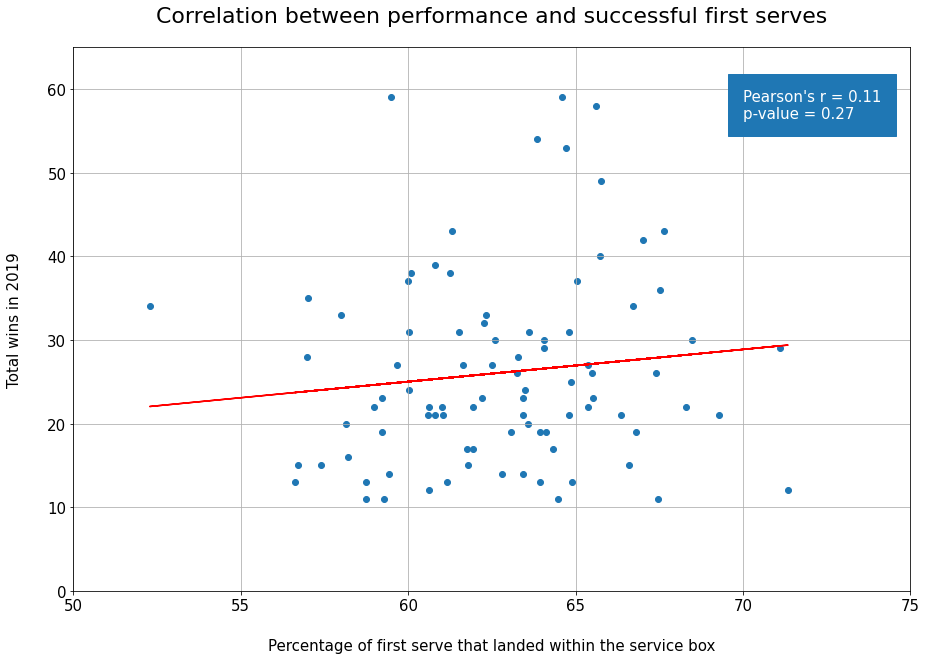

In [16]:
# Plot
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

fig, axis = plt.subplots(figsize=(15,10))
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.xaxis.grid(True)
axis.set_title('Correlation between performance and successful first serves',fontsize=22, pad=25.0)
axis.set_xlabel('Percentage of first serve that landed within the service box',fontsize=15, labelpad= 25.0)
axis.set_ylabel('Total wins in 2019',fontsize=15, labelpad=25.0)

textstr = '\n'.join(("Pearson's r = 0.11", "p-value = 0.27"))
plt.text(70, 56.5, textstr, color='white', fontsize=15,
        bbox=dict(facecolor='#1f77b4', edgecolor='#1f77b4', pad=15.0))

X = analysis['w_1stInTot'].values.reshape(-1, 1)
Y = analysis['wins'].values.reshape(-1, 1)

linear_regressor_one = LinearRegression()  # create object for the class
linear_regressor_one.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor_one.predict(X)  # make predictions

plt.plot(X, Y_pred, color='red')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0, 65)
plt.xlim(50, 75)

axis.scatter(X, Y)
plt.savefig("./Desktop/wins_1stin_corr.png", dpi=300)

In [251]:
# Correlation analysis
import numpy as np
import scipy.stats
scipy.stats.pearsonr(analysis['w_1stInTot'], analysis['wins'])

(0.11581269819998523, 0.27979893888062285)

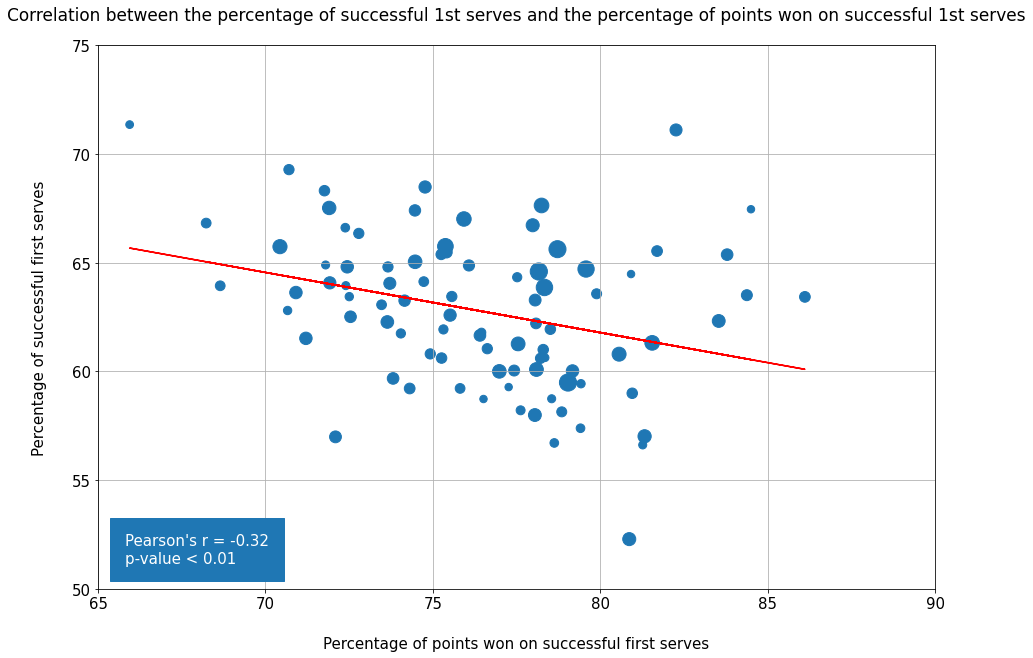

In [282]:
# Plot
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

fig, axis = plt.subplots(figsize=(15,10))
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.xaxis.grid(True)
axis.set_title('Correlation between the percentage of successful 1st serves and the percentage of points won on successful 1st serves',fontsize=17, pad=25.0)
axis.set_xlabel('Percentage of points won on successful first serves',fontsize=15, labelpad= 25.0)
axis.set_ylabel('Percentage of successful first serves',fontsize=15, labelpad=25.0)

textstr = '\n'.join(("Pearson's r = -0.32", "p-value < 0.01"))
plt.text(65.8, 51.2, textstr, color='white', fontsize=15,
        bbox=dict(facecolor='#1f77b4', edgecolor='#1f77b4', pad=15.0))

X_one = analysis['w_1stWonifIn'].values.reshape(-1, 1)
Y_one = analysis['w_1stInTot'].values.reshape(-1, 1)

linear_regressor_one = LinearRegression()  # create object for the class
linear_regressor_one.fit(X_one, Y_one)  # perform linear regression
Y_pred = linear_regressor_one.predict(X_one)  # make predictions

plt.plot(X_one, Y_pred, color='red')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(50, 75)
plt.xlim(65, 90)

axis.scatter(X_one, Y_one, s=analysis['wins']*5)
plt.savefig("./Desktop/1stin_1stwon_corr.png", dpi=300)

In [187]:
# Correlation analysis
import numpy as np
import scipy.stats
scipy.stats.pearsonr(analysis['w_1stWonifIn'], analysis['w_1stInTot'])

(-0.31106418493082283, 0.0030065140024029746)

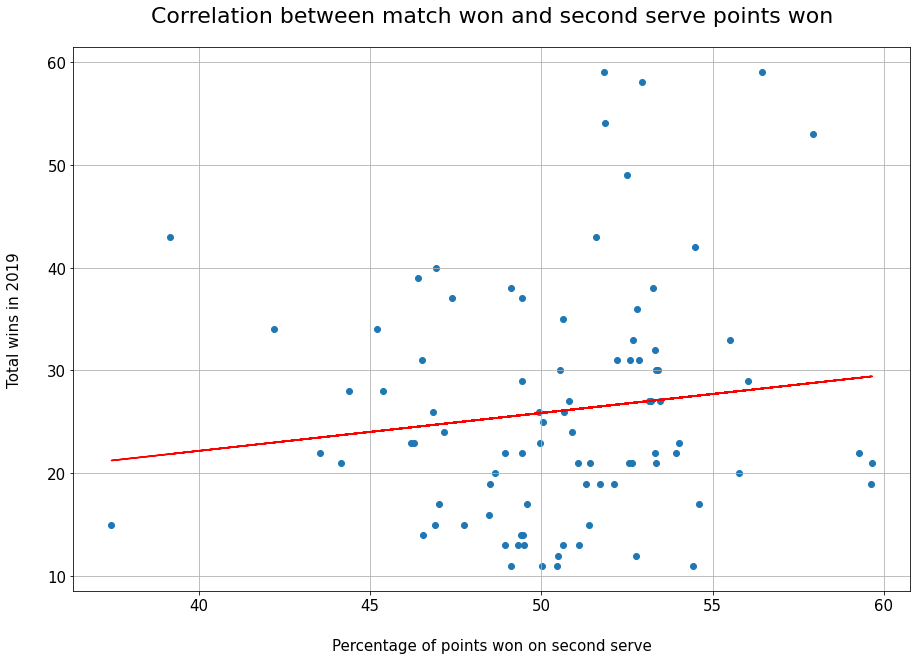

In [226]:
# Plot
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

fig, axis = plt.subplots(figsize=(15,10))
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.xaxis.grid(True)
axis.set_title('Correlation between match won and second serve points won',fontsize=22, pad=25.0)
axis.set_xlabel('Percentage of points won on second serve',fontsize=15, labelpad= 25.0)
axis.set_ylabel('Total wins in 2019',fontsize=15, labelpad=25.0)

X_two = analysis['w_2ndWonifIn']*(analysis['w_2ndInTot']/100)

X_two = X_two.values.reshape(-1, 1)
Y_two = analysis['wins'].values.reshape(-1, 1)

linear_regressor_one = LinearRegression()  # create object for the class
linear_regressor_one.fit(X_two, Y_two)  # perform linear regression
Y_pred_two = linear_regressor_one.predict(X_two)  # make predictions

plt.plot(X_two, Y_pred_two, color='red')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

axis.scatter(X_two, Y_two)
plt.savefig("./Desktop/wins_sndsvwon.png", dpi=300)

In [228]:
# Correlation analysis
import numpy as np
import scipy.stats
scipy.stats.pearsonr((analysis['w_2ndWonifIn']*(analysis['w_2ndInTot']/100)), analysis['wins'])

(0.12600738371296955, 0.23933795616415066)

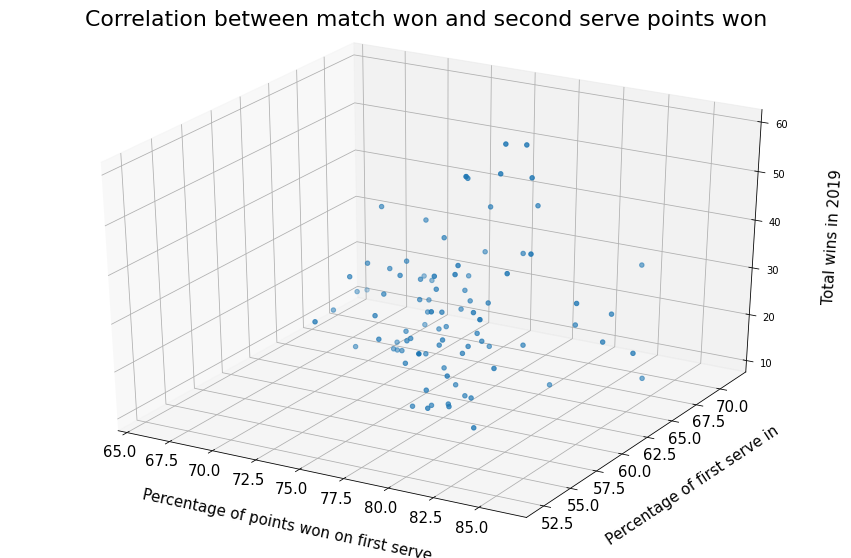

In [190]:
# Plot (TEST)
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,10))
axis = fig.add_subplot(111, projection='3d')
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.xaxis.grid(True)
axis.set_title('Correlation between match won and second serve points won',fontsize=22, pad=25.0)
axis.set_xlabel('Percentage of points won on first serve',fontsize=15, labelpad= 25.0)
axis.set_ylabel('Percentage of first serve in',fontsize=15, labelpad=25.0)
axis.set_zlabel('Total wins in 2019',fontsize=15, labelpad=25.0)

X_three = analysis['w_1stWonifIn']
Y_three = analysis['w_1stInTot']
Z_three = analysis['wins']

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

axis.scatter(X_three, Y_three, Z_three)
plt.savefig("./Desktop/3d_analysis.png", dpi=300)

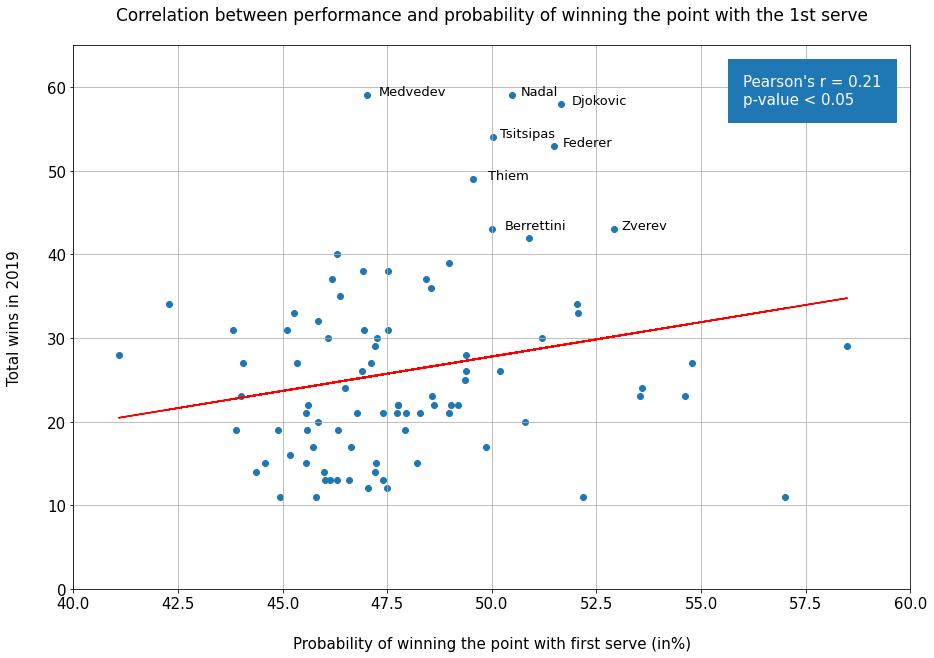

In [288]:
# Plot
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

fig, axis = plt.subplots(figsize=(15,10))
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.xaxis.grid(True)
axis.set_title('Correlation between performance and probability of winning the point with the 1st serve',fontsize=17, pad=25.0)
axis.set_xlabel('Probability of winning the point with first serve (in%)',fontsize=15, labelpad= 25.0)
axis.set_ylabel('Total wins in 2019',fontsize=15, labelpad=25.0)

points_won = analysis['w_1stWonifIn']*(analysis['w_1stInTot']/100)

plt.text(47.3, 59, "Medvedev", fontsize=13)
plt.text(50.7, 59, "Nadal", fontsize=13)
plt.text(51.9, 58, "Djokovic", fontsize=13)
plt.text(50.2, 54, "Tsitsipas", fontsize=13)
plt.text(51.7, 53, "Federer", fontsize=13)
plt.text(53.1, 43, "Zverev", fontsize=13)
plt.text(50.3, 43, "Berrettini", fontsize=13)
plt.text(49.9, 49, "Thiem", fontsize=13)

X_four = points_won.values.reshape(-1, 1)
Y_four = analysis['wins'].values.reshape(-1, 1)

textstr = '\n'.join(("Pearson's r = 0.21", "p-value < 0.05"))
plt.text(56, 58, textstr, color='white', fontsize=15,
        bbox=dict(facecolor='#1f77b4', edgecolor='#1f77b4', pad=15.0))

linear_regressor_one = LinearRegression()  # create object for the class
linear_regressor_one.fit(X_four, Y_four)  # perform linear regression
Y_pred = linear_regressor_one.predict(X_four)  # make predictions

plt.plot(X_four, Y_pred, color='red')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(40, 60)
plt.ylim(0, 65)

axis.scatter(X_four, Y_four)
plt.savefig("./Desktop/wins_prob1st_corr.png", dpi=300)

In [192]:
# Correlation analysis
import numpy as np
import scipy.stats
scipy.stats.pearsonr(points_won, analysis['wins'])

(0.21784310321661512, 0.0402889208193865)

In [193]:
# Quick look at Roger stats
roger = data['winner_name'].str.contains('Roger Federer')
roger = pd.DataFrame(data[roger])
roger.describe()

,draw_size,tourney_date,match_num,winner_id,winner_ht,winner_age,loser_id,loser_ht,loser_age,best_of,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
count,53.000000,5.300000e+01,53.000000,53.0,53.0,53.000000,53.000000,31.000000,53.000000,53.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,53.000000,53.000000,53.000000,53.000000
mean,87.849057,2.019057e+07,360.735849,103819.0,185.0,37.815763,112423.094340,183.225806,27.908153,3.679245,97.215686,7.627451,1.607843,71.666667,46.372549,36.901961,15.647059,12.274510,2.470588,3.196078,3.862745,2.901961,79.215686,48.156863,31.549020,15.058824,12.078431,4.588235,8.137255,3.698113,5873.584906,49.905660,1816.679245
std,46.049888,2.907710e+02,317.818777,0.0,0.0,0.242177,16156.161692,9.545364,4.754138,0.956226,35.510175,3.588653,1.563054,25.364279,16.807095,12.192219,5.881576,3.578147,2.343953,2.939521,3.156071,2.022423,26.582937,17.263108,13.043487,6.583044,3.531816,3.047468,3.655241,1.264682,1036.035518,46.179526,1887.569640
min,8.000000,2.019011e+07,116.000000,103819.0,185.0,37.434634,104259.000000,163.000000,19.923340,3.000000,52.000000,2.000000,0.000000,35.000000,20.000000,20.000000,7.000000,7.000000,0.000000,0.000000,0.000000,0.000000,40.000000,24.000000,12.000000,4.000000,7.000000,0.000000,2.000000,3.000000,4100.000000,2.000000,264.000000
25%,32.000000,2.019032e+07,246.000000,103819.0,185.0,37.607118,104919.000000,180.500000,23.216975,3.000000,72.500000,5.000000,0.500000,52.500000,33.000000,27.000000,11.000000,9.000000,0.500000,1.000000,2.000000,1.000000,60.500000,37.000000,24.500000,10.000000,9.000000,2.000000,5.000000,3.000000,4600.000000,15.000000,770.000000
50%,128.000000,2.019053e+07,287.000000,103819.0,185.0,37.798768,105676.000000,185.000000,28.717317,3.000000,85.000000,7.000000,1.000000,65.000000,43.000000,37.000000,15.000000,11.000000,2.000000,3.000000,3.000000,3.000000,75.000000,43.000000,28.000000,14.000000,11.000000,5.000000,8.000000,3.000000,6190.000000,35.000000,1150.000000
75%,128.000000,2.019081e+07,298.000000,103819.0,185.0,38.009582,106432.000000,188.000000,32.353183,5.000000,116.500000,10.000000,2.000000,83.500000,57.500000,43.000000,19.000000,15.000000,4.000000,5.000000,6.000000,4.000000,95.000000,59.000000,38.500000,20.000000,14.000000,6.000000,10.000000,4.000000,6620.000000,68.000000,2055.000000
max,128.000000,2.019111e+07,1503.000000,103819.0,185.0,38.258727,200282.000000,206.000000,35.362081,5.000000,215.000000,16.000000,7.000000,149.000000,94.000000,73.000000,32.000000,22.000000,10.000000,13.000000,15.000000,8.000000,171.000000,113.000000,81.000000,33.000000,22.000000,16.000000,18.000000,7.000000,7460.000000,190.000000,8945.000000


In [194]:
# Quick look at Paire stats
paire = data['winner_name'].str.contains('Benoit Paire')
paire = pd.DataFrame(data[paire])
paire.describe()

,draw_size,tourney_date,match_num,winner_id,winner_ht,winner_age,loser_id,loser_ht,loser_age,best_of,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
count,34.000000,3.400000e+01,34.000000,34.0,34.0,34.000000,34.000000,18.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,62.117647,2.019007e+07,353.823529,105332.0,196.0,30.082216,117149.882353,186.222222,27.208922,3.411765,103.205882,10.852941,6.323529,81.735294,42.735294,34.558824,19.647059,12.852941,4.088235,5.882353,4.088235,2.647059,84.735294,53.911765,35.088235,15.147059,12.882353,5.176471,9.029412,42.647059,1137.352941,72.558824,844.117647
std,36.900985,2.252338e+03,281.298016,0.0,0.0,0.211046,27624.834052,6.830344,4.531537,0.820851,43.905394,5.064029,3.598995,34.374329,18.808942,13.536015,9.243777,4.862549,3.545100,4.922211,3.612836,1.593212,32.680556,23.201839,16.108284,6.363401,4.909883,3.613699,5.172686,15.466253,275.230029,34.409469,349.886282
min,32.000000,2.018123e+07,128.000000,105332.0,196.0,29.648186,104269.000000,172.000000,18.778919,3.000000,48.000000,4.000000,1.000000,30.000000,18.000000,16.000000,6.000000,5.000000,0.000000,0.000000,1.000000,0.000000,44.000000,24.000000,16.000000,5.000000,5.000000,0.000000,3.000000,23.000000,763.000000,15.000000,301.000000
25%,32.000000,2.019041e+07,273.750000,105332.0,196.0,29.926078,105436.250000,183.000000,24.255305,3.000000,71.500000,7.000000,4.000000,58.500000,31.000000,25.250000,15.000000,9.250000,1.000000,2.000000,2.000000,1.000000,64.250000,39.500000,23.250000,11.250000,10.000000,3.000000,6.000000,30.000000,935.750000,50.000000,602.250000
50%,64.000000,2.019053e+07,289.500000,105332.0,196.0,30.050650,105903.500000,188.000000,27.608487,3.000000,86.500000,9.500000,5.500000,71.000000,37.000000,32.500000,18.000000,11.000000,3.000000,5.000000,3.000000,3.000000,75.000000,51.000000,34.500000,14.500000,11.000000,4.000000,9.000000,38.000000,1168.000000,67.500000,806.500000
75%,64.000000,2.019082e+07,297.000000,105332.0,196.0,30.275838,110174.250000,188.000000,29.704312,3.000000,124.500000,14.000000,8.000000,97.750000,53.250000,42.250000,21.750000,15.000000,7.000000,8.750000,5.000000,4.000000,97.750000,61.750000,39.750000,16.750000,14.750000,7.000000,10.000000,51.750000,1403.000000,90.500000,958.250000
max,128.000000,2.019103e+07,1314.000000,105332.0,196.0,30.472279,200175.000000,206.000000,35.739904,5.000000,273.000000,26.000000,15.000000,197.000000,98.000000,68.000000,53.000000,30.000000,14.000000,20.000000,18.000000,6.000000,213.000000,142.000000,88.000000,33.000000,30.000000,19.000000,29.000000,69.000000,1553.000000,172.000000,2040.000000


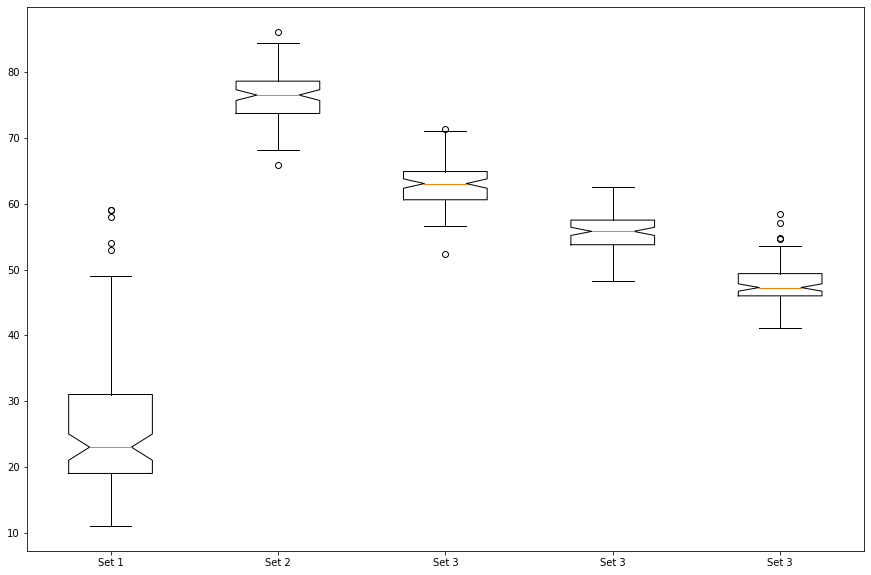

In [195]:
# Plot (TEST)
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

fig, axis = plt.subplots(figsize=(15,10))
# Grid lines, Xticks, Xlabel, Ylabel

points_won = analysis['w_1stWonifIn']*(analysis['w_1stInTot']/100)

X_five = analysis['wins']
Y_five = analysis['w_1stWonifIn']
Z_five = analysis['w_1stInTot']
T_five = analysis['w_2ndWonifIn']
M_five = points_won

plt.boxplot((X_five, Y_five, Z_five, T_five, M_five), notch=True, sym="o", labels=["Set 1", "Set 2", "Set 3", "Set 3", "Set 3"])
plt.savefig("./Desktop/points_won.png", dpi=300)

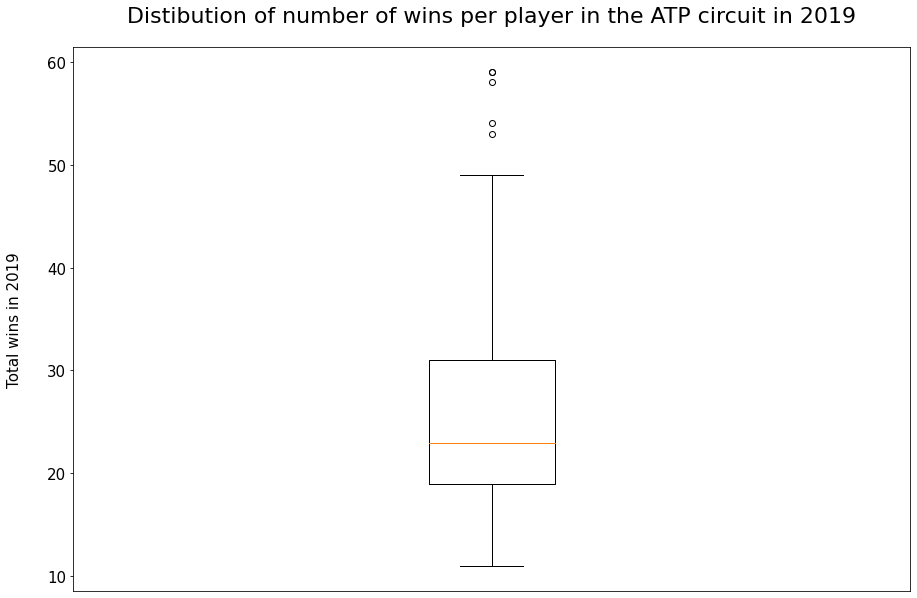

In [247]:
# Plot
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

fig, axis = plt.subplots(figsize=(15,10))
# Grid lines, Xticks, Xlabel, Ylabel

axis.set_title('Distibution of number of wins per player in the ATP circuit in 2019',fontsize=22, pad=25.0)
axis.set_ylabel('Total wins in 2019',fontsize=15, labelpad=25.0)
plt.yticks(fontsize=15)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

X_five = analysis['wins']

plt.boxplot((X_five), sym="o", labels=None)
plt.savefig("./Desktop/wins_distribution.png", dpi=300)

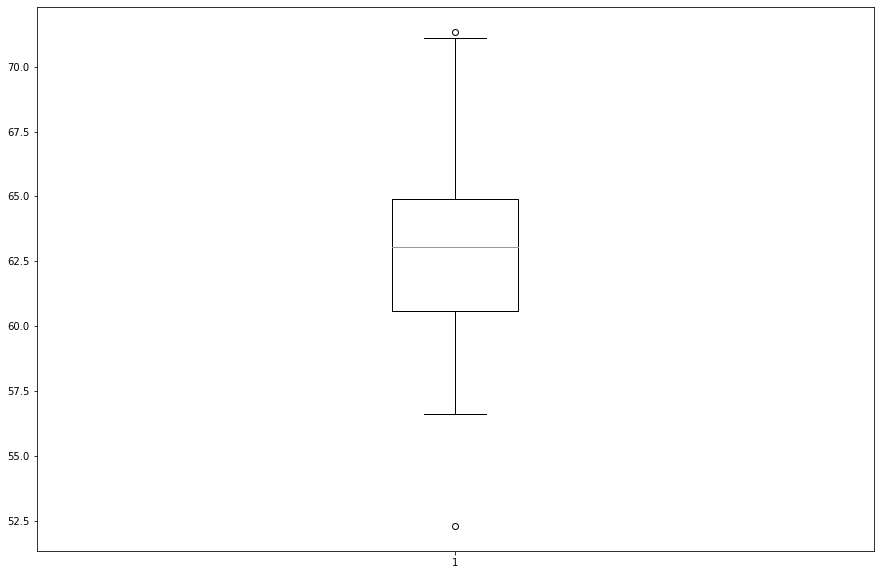

In [249]:
# Plot
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

fig, axis = plt.subplots(figsize=(15,10))
# Grid lines, Xticks, Xlabel, Ylabel

Z_five = analysis['w_1stInTot']

plt.boxplot(Z_five)
plt.savefig("./Desktop/1stserve_in.png", dpi=300)

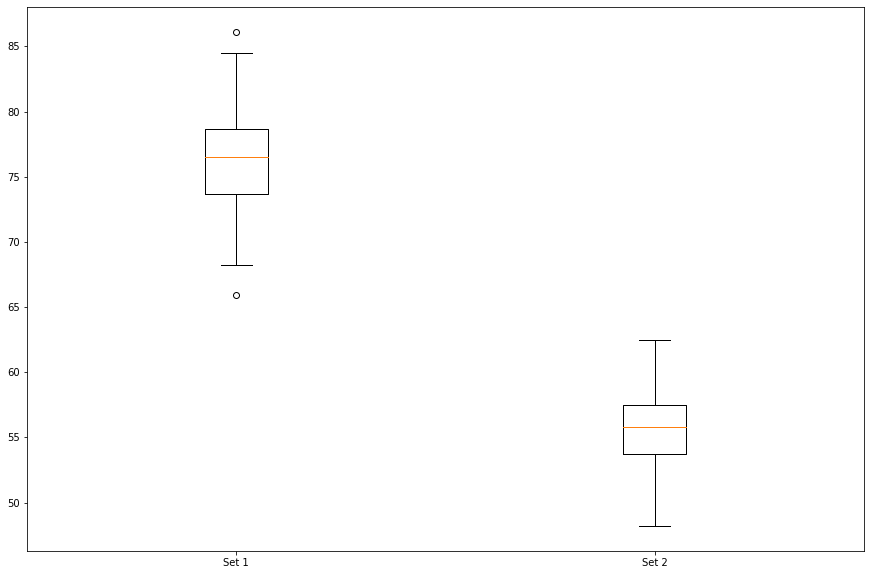

In [198]:
# Plot
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

fig, axis = plt.subplots(figsize=(15,10))
# Grid lines, Xticks, Xlabel, Ylabel

Y_five = analysis['w_1stWonifIn']
T_five = analysis['w_2ndWonifIn']

plt.boxplot((Y_five, T_five), sym="o", labels=["Set 1", "Set 2"])
plt.savefig("./Desktop/points_won.png", dpi=300)

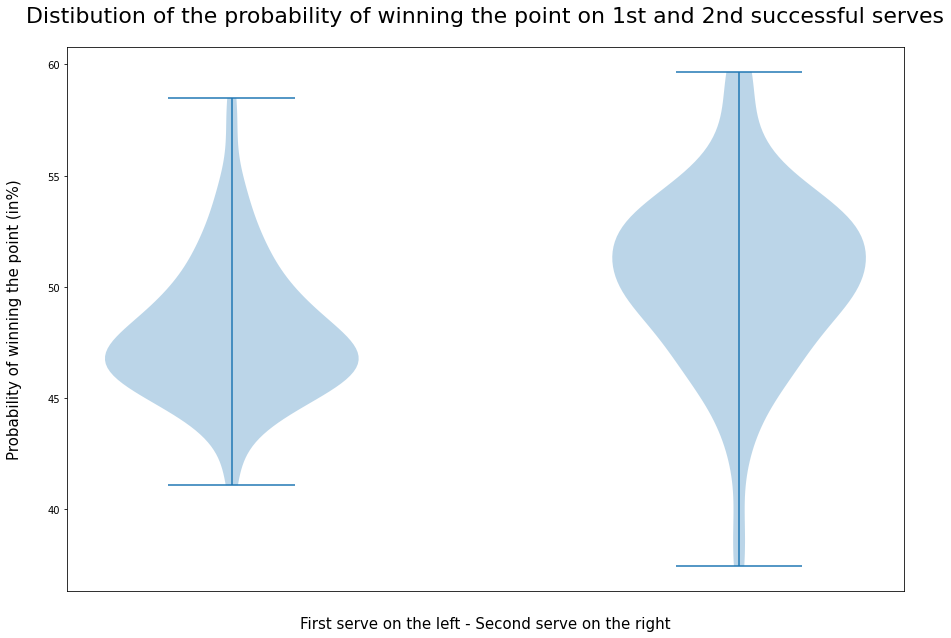

In [323]:
# Plot
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

fig, axis = plt.subplots(figsize=(15,10))
# Grid lines, Xticks, Xlabel, Ylabel

axis.set_title('Distibution of the probability of winning the point on 1st and 2nd successful serves',fontsize=22, pad=25.0)
axis.set_ylabel('Probability of winning the point (in%)',fontsize=15, labelpad=25.0)
axis.set_xlabel('First serve on the left - Second serve on the right',fontsize=15, labelpad=25.0)

prob_1st = analysis['w_1stWonifIn']*(analysis['w_1stInTot']/100)
prob_2nd = analysis['w_2ndWonifIn']*(analysis['w_2ndInTot']/100)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

M_five = prob_1st
F_five = prob_2nd

vp = plt.violinplot((M_five, F_five))

plt.savefig("./Desktop/distr_allprob.png", dpi=300)

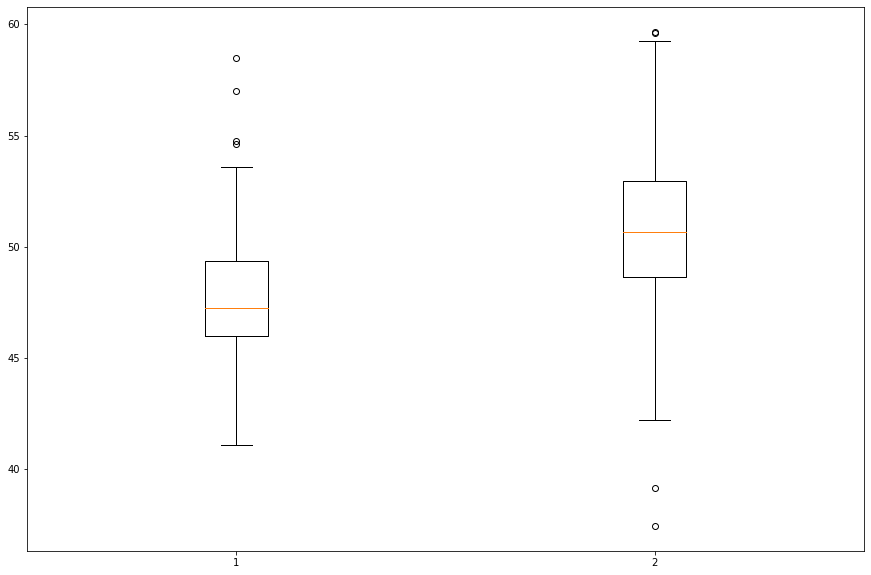

In [225]:
# Plot
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

fig, axis = plt.subplots(figsize=(15,10))
# Grid lines, Xticks, Xlabel, Ylabel

prob_1st = analysis['w_1stWonifIn']*(analysis['w_1stInTot']/100)
prob_2nd = analysis['w_2ndWonifIn']*(analysis['w_2ndInTot']/100)

M_five = prob_1st
F_five = prob_2nd

plt.boxplot((M_five, F_five))
plt.savefig("./Desktop/points_won.png", dpi=300)

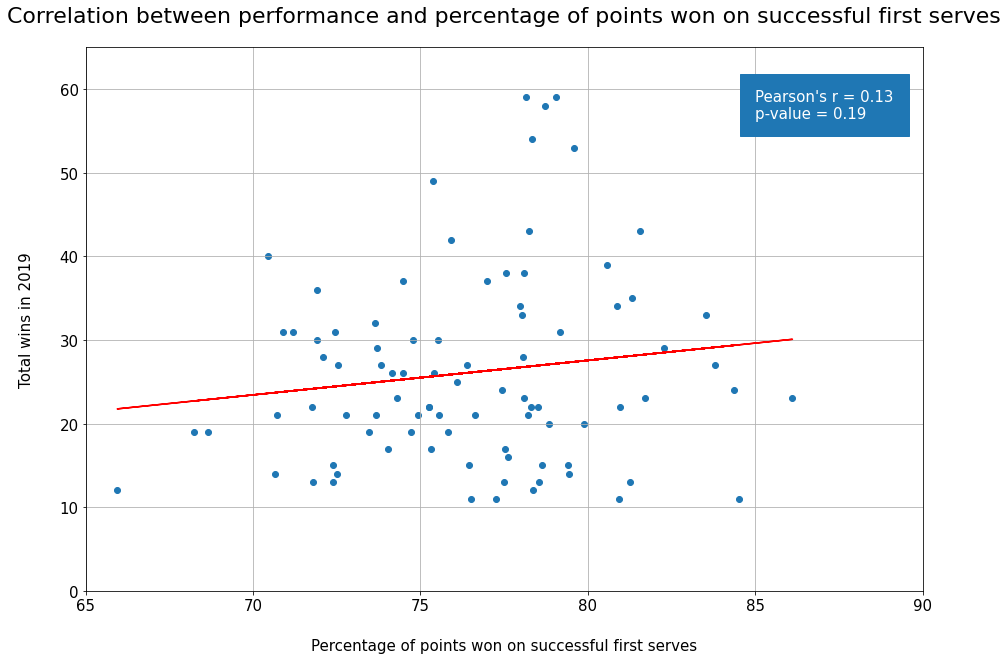

In [274]:
# Plot
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

fig, axis = plt.subplots(figsize=(15,10))
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.xaxis.grid(True)
axis.set_title('Correlation between performance and percentage of points won on successful first serves',fontsize=22, pad=25.0)
axis.set_xlabel('Percentage of points won on successful first serves',fontsize=15, labelpad= 25.0)
axis.set_ylabel('Total wins in 2019',fontsize=15, labelpad=25.0)

textstr = '\n'.join(("Pearson's r = 0.13", "p-value = 0.19"))
plt.text(85, 56.5, textstr, color='white', fontsize=15,
        bbox=dict(facecolor='#1f77b4', edgecolor='#1f77b4', pad=15.0))

X_six = analysis['w_1stWonifIn'].values.reshape(-1, 1)
Y_six = analysis['wins'].values.reshape(-1, 1)

linear_regressor_one = LinearRegression()  # create object for the class
linear_regressor_one.fit(X_six, Y_six)  # perform linear regression
Y_pred = linear_regressor_one.predict(X_six)  # make predictions

plt.plot(X_six, Y_pred, color='red')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0, 65)
plt.xlim(65, 90)

axis.scatter(X_six, Y_six)
plt.savefig("./Desktop/wins_1stwon_corr.png", dpi=300)

In [272]:
# Correlation analysis
import numpy as np
import scipy.stats
scipy.stats.pearsonr(analysis['w_1stWonifIn'], analysis['wins'])

(0.13955182233061825, 0.1921276749178409)

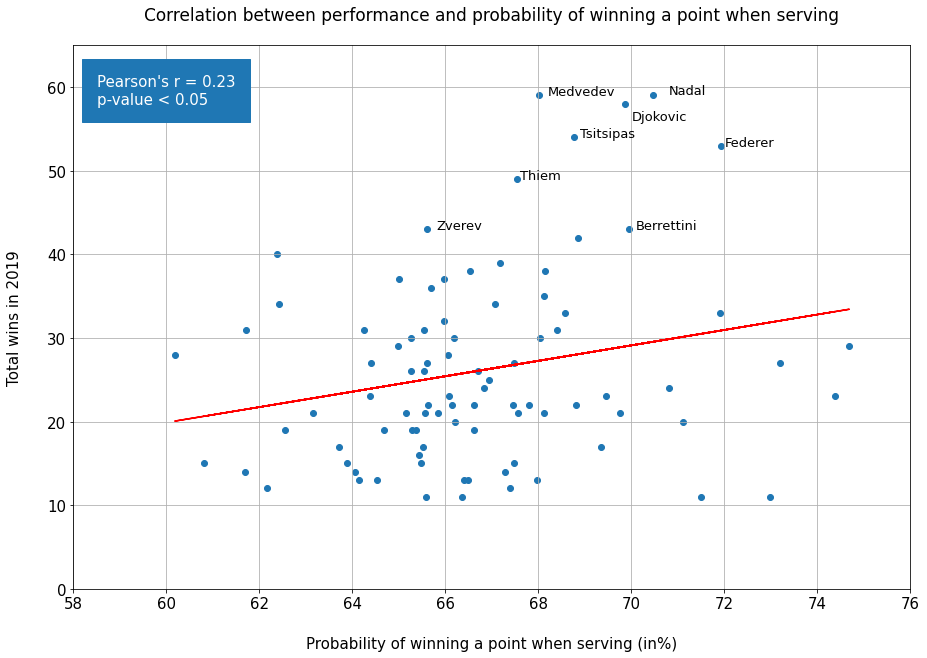

In [341]:
# Plot
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

fig, axis = plt.subplots(figsize=(15,10))
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.xaxis.grid(True)
axis.set_title('Correlation between performance and probability of winning a point when serving',fontsize=17, pad=25.0)
axis.set_xlabel('Probability of winning a point when serving (in%)',fontsize=15, labelpad= 25.0)
axis.set_ylabel('Total wins in 2019',fontsize=15, labelpad=25.0)

points_won_1st = analysis['w_1stWonifIn']*(analysis['w_1stInTot']/100)/100
points_won_2nd = analysis['w_2ndWonifIn']*(analysis['w_2ndInTot']/100)/100
prob = 1-(analysis['w_1stInTot']/100)
final_prob = (points_won_1st + prob * points_won_2nd) * 100

plt.text(68.2, 59, "Medvedev", fontsize=13)
plt.text(70.8, 59.15, "Nadal", fontsize=13)
plt.text(70, 56, "Djokovic", fontsize=13)
plt.text(68.9, 54, "Tsitsipas", fontsize=13)
plt.text(72, 53, "Federer", fontsize=13)
plt.text(65.8, 43, "Zverev", fontsize=13)
plt.text(70.1, 43, "Berrettini", fontsize=13)
plt.text(67.6, 49, "Thiem", fontsize=13)

X_sev = final_prob.values.reshape(-1, 1)
Y_sev = analysis['wins'].values.reshape(-1, 1)

textstr = '\n'.join(("Pearson's r = 0.23", "p-value < 0.05"))
plt.text(58.5, 58, textstr, color='white', fontsize=15,
        bbox=dict(facecolor='#1f77b4', edgecolor='#1f77b4', pad=15.0))

linear_regressor_one = LinearRegression()  # create object for the class
linear_regressor_one.fit(X_sev, Y_sev)  # perform linear regression
Y_pred = linear_regressor_one.predict(X_sev)  # make predictions

plt.plot(X_sev, Y_pred, color='red')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(58, 76)
plt.ylim(0, 65)

axis.scatter(X_sev, Y_sev)
plt.savefig("./Desktop/wins_prob1stand2nd_corr.png", dpi=300)

In [330]:
# Correlation analysis
import numpy as np
import scipy.stats
scipy.stats.pearsonr(final_prob, analysis['wins'])

(0.22926377316153074, 0.030682308706806907)

In [335]:
final_prob.head(10)

Daniil Medvedev          68.016506
Rafael Nadal             70.471639
Novak Djokovic           69.860783
Stefanos Tsitsipas       68.770404
Roger Federer            71.936373
Dominic Thiem            67.544962
Alexander Zverev         65.598445
Matteo Berrettini        69.958341
Roberto Bautista Agut    68.858336
Diego Schwartzman        62.382015
dtype: float64